# Preprocessing of smoking.csv dataset for unsupervised learning

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

load data

In [17]:
unsup_data = pd.read_csv("random_tree_data/train_data.csv")


### vizualize to compare with clustering

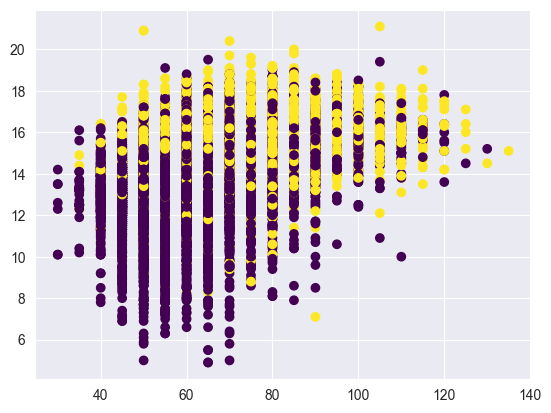

In [20]:
plt.scatter(x = unsup_data['weight(kg)'],
            y = unsup_data['hemoglobin'],
            c = unsup_data['smoking'],
            cmap = 'viridis')

### get rid of target variable - smoking

In [5]:
unsup_data.drop(["smoking"], axis=1, inplace=True)
unsup_data

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,AST,ALT,Gtp,dental caries,tartar,bmi,healthy weight,eyesight_total,vision,hearing_impairment
0,1,25,170,75,89.0,1.0,1.0,1.0,1.0,110.0,...,35.0,53.0,61.0,1,1,25.95,1.0,2.0,1,0
1,1,50,170,85,90.0,1.2,1.2,1.0,1.0,115.0,...,40.0,47.0,44.0,0,1,29.41,1.0,2.4,1,0
2,0,45,150,60,81.2,0.6,0.5,1.0,1.0,121.0,...,33.0,57.0,36.0,0,1,26.67,1.0,1.1,1,0
3,1,45,160,65,87.0,1.0,1.2,1.0,1.0,133.0,...,43.0,52.0,61.0,0,1,25.39,1.0,2.2,1,0
4,1,40,180,80,86.0,1.2,0.9,1.0,1.0,112.0,...,15.0,16.0,31.0,0,1,24.69,0.0,2.1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44548,0,40,170,75,84.0,0.1,0.2,1.0,1.0,116.0,...,33.0,43.0,46.0,0,0,25.95,1.0,0.3,3,0
44549,1,40,175,65,80.0,1.2,1.0,1.0,1.0,136.0,...,21.0,22.0,26.0,0,0,21.22,0.0,2.2,1,0
44550,0,60,150,50,77.0,0.9,0.9,1.0,1.0,108.0,...,24.0,23.0,25.0,1,1,22.22,0.0,1.8,1,0
44551,1,35,180,95,101.0,0.9,1.0,1.0,1.0,137.0,...,16.0,22.0,35.0,0,1,29.32,1.0,1.9,1,0


### Normalization

In [ ]:
#tbd

### Feature rescaling

In [ ]:
#tbd

### subsetting
**only males**

In [7]:
rslt = unsup_data.loc[unsup_data['gender']>0]
rslt

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,AST,ALT,Gtp,dental caries,tartar,bmi,healthy weight,eyesight_total,vision,hearing_impairment
0,1,25,170,75,89.0,1.0,1.0,1.0,1.0,110.0,...,35.0,53.0,61.0,1,1,25.95,1.0,2.0,1,0
1,1,50,170,85,90.0,1.2,1.2,1.0,1.0,115.0,...,40.0,47.0,44.0,0,1,29.41,1.0,2.4,1,0
3,1,45,160,65,87.0,1.0,1.2,1.0,1.0,133.0,...,43.0,52.0,61.0,0,1,25.39,1.0,2.2,1,0
4,1,40,180,80,86.0,1.2,0.9,1.0,1.0,112.0,...,15.0,16.0,31.0,0,1,24.69,0.0,2.1,1,0
5,1,35,170,75,91.0,1.5,1.0,1.0,1.0,137.0,...,26.0,33.0,31.0,0,1,25.95,1.0,2.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44545,1,60,165,65,93.0,0.7,0.4,1.0,1.0,139.0,...,19.0,7.0,145.0,1,1,23.88,0.0,1.1,1,0
44546,1,20,180,85,92.5,1.5,1.5,1.0,1.0,115.0,...,21.0,17.0,25.0,1,0,26.23,1.0,3.0,0,0
44547,1,60,175,70,91.0,1.5,1.2,1.0,1.0,141.0,...,37.0,40.0,66.0,0,1,22.86,0.0,2.7,0,0
44549,1,40,175,65,80.0,1.2,1.0,1.0,1.0,136.0,...,21.0,22.0,26.0,0,0,21.22,0.0,2.2,1,0


dataframe to csv

In [8]:
rslt.to_csv("clustering_data.csv", index_label=False, index=False)